In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import imageio # for opening the images into np arrays

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten # Activation
from keras.callbacks import ModelCheckpoint

from tensorflow import set_random_seed

%matplotlib inline

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# for getting reproducible results
random_seed = 112
np.random.seed(random_seed)

### Read in Data:

In [3]:
data_filepath = '../protein_data/all/'
df = pd.read_csv(data_filepath + 'clean_train.csv')

df.drop(columns = 'Target', inplace=True) # not needed since it's been one-hot encoded

### Train-Test Split:

In [4]:
def load_img_slice(train_slice):
# This function builds and returns an array of images out of a series of Ids
    i = 0
    
    # Make empty X_array to fill with image data
    X_array = np.empty((len(train_slice), 512, 512, 3))

    # for each Id
    for img in train_slice:

        # Load image
        X_array[i,:,:,:] = imageio.imread('../protein_data/all/rgb_images/'+img+'_rgb.png')
        i += 1

    return X_array

In [5]:
# Slice size:
slice_size = 3000

# Slice out the portion of the training data to work with
train_slice = df['Id'][0:slice_size]

# make slice of labels
y = df.iloc[0:slice_size, 1:]

In [6]:
# Call the function to load the images
X = load_img_slice(train_slice)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size=.25)

In [8]:
X.shape

(3000, 512, 512, 3)

### Neural Network:

In [10]:
# Compute class_weights to pass into the model
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

In [16]:
# Instantiate model
model = Sequential()

# Input layer
model.add(Conv2D(filters = 5,                   # number of filters
                        kernel_size = 5,        # height/width of filter
                        activation='relu',      # activation function 
                        input_shape=(X.shape[1],X.shape[2],X.shape[3]))) # shape of input (image)
model.add(MaxPooling2D(pool_size=(2,2)))

# 2
model.add(Conv2D(5, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3
model.add(Conv2D(5, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4
model.add(Conv2D(5, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 5
model.add(Conv2D(5, kernel_size = 5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Dropout(0.25))

# Flatten convolutional layers for fully connected layers
model.add(Flatten())

# Fully connected layers
# 1
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
# 2
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
# 3
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# saves the model weights after each epoch if the validation loss score decreased
checkpointer = ModelCheckpoint(filepath='assets/checkpoint_model.hdf5', verbose=1, save_best_only=True,) 
#                                monitor='val_acc', mode='max')

In [17]:
start = time.time()

set_random_seed(random_seed) # set tensorflow random state

result = model.fit(X_train, y_train,
                   validation_data = (X_test, y_test), 
                   batch_size=25,
                   epochs=50,
                   verbose=1,
#                    class_weight = class_weights,
                   callbacks = [checkpointer]);

# Print the runtime:
print('Runtime: ', round((time.time() - start)/60, 3), ' minutes')

Train on 2250 samples, validate on 750 samples
Epoch 1/50
2250/2250 [==============================] - 1185s 527ms/step - loss: 18.7499 - acc: 0.4040 - val_loss: 5.1041 - val_acc: 0.4093

Epoch 00001: val_loss improved from inf to 5.10411, saving model to assets/checkpoint_model.hdf5
Epoch 2/50
2250/2250 [==============================] - 979s 435ms/step - loss: 4.3935 - acc: 0.3853 - val_loss: 4.2772 - val_acc: 0.4093

Epoch 00002: val_loss improved from 5.10411 to 4.27721, saving model to assets/checkpoint_model.hdf5
Epoch 3/50
2250/2250 [==============================] - 936s 416ms/step - loss: 4.3049 - acc: 0.4156 - val_loss: 4.2346 - val_acc: 0.4093

Epoch 00003: val_loss improved from 4.27721 to 4.23457, saving model to assets/checkpoint_model.hdf5
Epoch 4/50
2250/2250 [==============================] - 940s 418ms/step - loss: 4.2756 - acc: 0.4160 - val_loss: 4.2432 - val_acc: 0.4093

Epoch 00004: val_loss did not improve from 4.23457
Epoch 5/50
2250/2250 [=======================

2250/2250 [==============================] - 952s 423ms/step - loss: 1.3102 - acc: 0.7013 - val_loss: 6.2102 - val_acc: 0.2267

Epoch 00043: val_loss did not improve from 4.23457
Epoch 44/50
2250/2250 [==============================] - 950s 422ms/step - loss: 1.2869 - acc: 0.7151 - val_loss: 6.3678 - val_acc: 0.2013

Epoch 00044: val_loss did not improve from 4.23457
Epoch 45/50
2250/2250 [==============================] - 958s 426ms/step - loss: 1.2752 - acc: 0.7120 - val_loss: 6.3741 - val_acc: 0.1853

Epoch 00045: val_loss did not improve from 4.23457
Epoch 46/50
2250/2250 [==============================] - 958s 426ms/step - loss: 1.2864 - acc: 0.7156 - val_loss: 6.5488 - val_acc: 0.2080

Epoch 00046: val_loss did not improve from 4.23457
Epoch 47/50
2250/2250 [==============================] - 949s 422ms/step - loss: 1.2634 - acc: 0.7124 - val_loss: 6.7426 - val_acc: 0.2080

Epoch 00047: val_loss did not improve from 4.23457
Epoch 48/50
2250/2250 [==============================] - 

# Plot Accuracy vs. Epochs

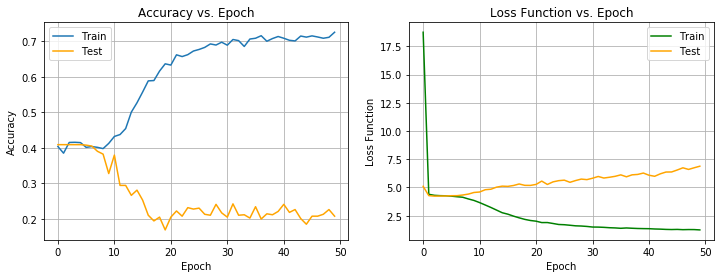

In [41]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))

i = 0
for metric in ['acc', 'loss']:
    
    # Change settings for each subplot
    if i == 0:
        metric_label = 'Accuracy'
        c = '#1f77b4'
    else:
        metric_label = 'Loss Function'
        c = 'green'

    # Plot metrics
    ax[i].plot(result.history[metric], color = c)
    ax[i].plot(result.history['val_'+metric], color = 'orange')
        
    # Set title
    ax[i].set_title(metric_label + ' vs. Epoch')

    # Set axis labels
    ax[i].set_ylabel(metric_label)
    ax[i].set_xlabel('Epoch')

    # Add a legend
    ax[i].legend(['Train', 'Test'], loc='best')

    # Plot girdlines:
    ax[i].grid()

    i += 1

In [19]:
# check macro f1 score, that's how the cometition is evaluated
# model.metrics_names

### Kaggle Submission Link:

https://www.kaggle.com/c/human-protein-atlas-image-classification/submit

<hr>

<br>